# The Introductory Moose model

This is the entire model you learned to build in the ['Introduction to python scripting for MOOSE'](Introduction to python coding with Moose.ipynb) page.

Having understood what each component of the model does and how it contributes to the model, this is an excellent opportunity to simply mess around. The best way to learn how to code is to test the codes limits. Try and see what you can and cannot do, and what the code allows.

Try manipulating the parameters of the pulsegen (delay, width, etc.) and the soma (Cm, Rm, initVm) while keeping everything else the same and see how it affects the ouput. 

You are always welcome to add new components to the model (which you can find in the inbuilt documentation, and in the ``Doxygen`` page on the MOOSE website)

Dont be afraid to mess things up!! if you made a mistake and dont know what happened, you can always refresh the page and return to the original code. 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Accessing existing paths using object constrcutors has been deprecated. Use  moose.element to access existing object. In future  this will be an error.

  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Accessing existing paths using object constrcutors has been deprecated. Use  moose.element to access existing object. In future  this will be an error.

  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Accessing existing paths using object constrcutors has been deprecated. Use  moose.element to access existing object. In future  this will be an error.

  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Accessing existing paths using object constrcutors has been deprecated. Use  moose.element to access existing object. In future  this will be an error.

  if 

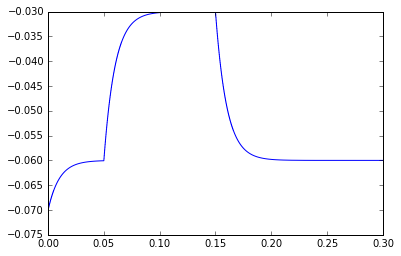

In [3]:
import moose

#create neutral "folder" to contain the model
model = moose.Neutral('/model')
#create 'cell-body' compartment
soma = moose.Compartment('/model/soma')
#create pulse-generator
pulse = moose.PulseGen('/model/pulse')


#create data "folder" to contain data
data = moose.Neutral('/data')
#create table
vmtab = moose.Table('/data/soma_Vm')
#allows you to see figures within notebook (Not required outside this page)
%matplotlib inline 

#set parameters
soma.Cm = 1e-9 #Membrane capacitance (Farads)
soma.Rm = 1e7 #Membrane leak resistance (Ohms)
soma.initVm = -0.07 #Initial membrane potential (Volts)

#set parameters for pulse generation
pulse.delay[0] = 50e-3
pulse.width[0] = 100e-3
pulse.level[0] = 1e-9
pulse.delay[1] = 1e9

#connect different parts of model to each other:
#connect pulse generator to "cell body" of neuron
m = moose.connect(pulse, 'output', soma, 'injectMsg')
#connect table to "cell body's" output
moose.connect(vmtab, 'requestOut', soma, 'getVm')


#reinitialize the model (start from beginning)
moose.reinit()
#run model for 300 ms
moose.start(300e-3)

#import pylab so we can plot the graphs
import pylab
#creates time values to plot against (linear time steps from 0 to 300 ms)
t = pylab.linspace(0, 300e-3, len(vmtab.vector))
#plots data from model against time axis
pylab.plot(t, vmtab.vector)
#shows previously created plot
pylab.show()